# 逻辑回归

## (1)梯度下降实现逻辑回归

In [386]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif'] = ['SimHei']

In [387]:
# def sigmoid(z):
#     return 1/(1+np.exp(-z))

In [388]:
# def gradient_descent(X, y, rate, iterations=10000):
#     m = len(y) 
#     X = np.c_[np.ones(m), X]  # 添加常数项
#     theta = np.zeros(X.shape[1])  # 初始化参数，包括截距
#     cost_record = np.zeros(iterations)  # 用来记录cost function的变化
    
#     for i in range(iterations):
#         h = sigmoid(np.dot(X, theta))
        
#         # 计算梯度
#         gradient = np.dot(X.T, (h-y))
        
#         # 更新参数
#         theta = theta - rate * gradient
        
#         # 记录cost function
#         cost = -np.dot(y.T, np.log(sigmoid(np.dot(X, theta)))) - np.dot((1-y).T, np.log(1-sigmoid(np.dot(X, theta))))
#         cost_record[i] = cost
        
#     return theta, cost_record

In [462]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.loss_record = []
        self.gradient_record = []
        self.accuracy_record = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for iteration in range(self.num_iterations):
            # 计算预测值
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)

            # 计算损失函数
            cost = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            self.loss_record.append(cost)

            # 计算梯度
            dw = 1/m * np.dot(X.T, (predictions - y))

            db = 1/m * np.sum((predictions - y))
            self.gradient_record.append(np.linalg.norm(dw))
            
            # 计算准确率
            accuracy = self.compute_accuracy(predictions.round(), y)
            self.accuracy_record.append(accuracy)

            # 更新参数
            self.weights -= (self.learning_rate * dw)
            self.bias -= self.learning_rate * db
            
        return self.loss_record, self.gradient_record
    
    def compute_accuracy(self, predictions, y):
        accuracy = np.mean(predictions == y)
        return accuracy

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions > 0.5).astype(int)
    
    def plot_accuracy(self):
        plt.plot(range(1, self.num_iterations + 1), self.accuracy_record, marker='o', color='green')
        plt.title('Accuracy over iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy')
        plt.show()
    
    def get_theta(self):
        return self.weights, self.bias
    

In [390]:
def draw(num_iterations, loss_record, gradient_norm_record):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(num_iterations), loss_record)
    plt.xlabel('迭代次数')
    plt.ylabel('损失函数值')
    plt.title('损失函数变化')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(num_iterations), gradient_norm_record)
    plt.xlabel('迭代次数')
    plt.ylabel('梯度模')
    plt.title('梯度模变化')
    
    plt.tight_layout()
    plt.show()

## (2)鸢尾花数据集

iris 数据中有三个标签，需要考虑如何使用二分类算法解决多分类问题

In [391]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [392]:
# 加载iris数据集
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)

feature_names = iris.feature_names
print(feature_names)

target_names = iris.target_names
print(target_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [393]:
from sklearn.preprocessing import StandardScaler
# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### OvO

思路：训练三个分类器，每个分类器对两个类别进行分类，最后通过三个分类器的结果“投票”决定划分的类别

#### 分类器1（setosa vs. versicolor)

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=66)

In [395]:
indices_01 = (y_train == 0) | (y_train == 1)  # 找出类别为0和1的索引
indices_01_t = (y_test == 0) | (y_test == 1)

X_train_1 = X_train[indices_01]
X_test_1 = X_test[indices_01_t]

y_train_1 = y_train[indices_01]
y_test_1 = y_test[indices_01_t]

下面使用编写的梯度下降逻辑回归训练

In [463]:
if __name__ == "__main__":
    # 实例化和训练逻辑回归模型
    model_1 = LogisticRegression()
    ls_1, gr_1 = model_1.fit(X_train_1, y_train_1)


    print(model_1.predict(X_test_1))
    print(y_test_1)
    
    theta = model_1.get_theta()


[1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0]
[1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0]


In [464]:
theta

(array([ 1.02352992, -2.24077983,  2.08131386,  1.89977742]),
 2.104288827931714)

模型在测试集上分类完全正确！！！

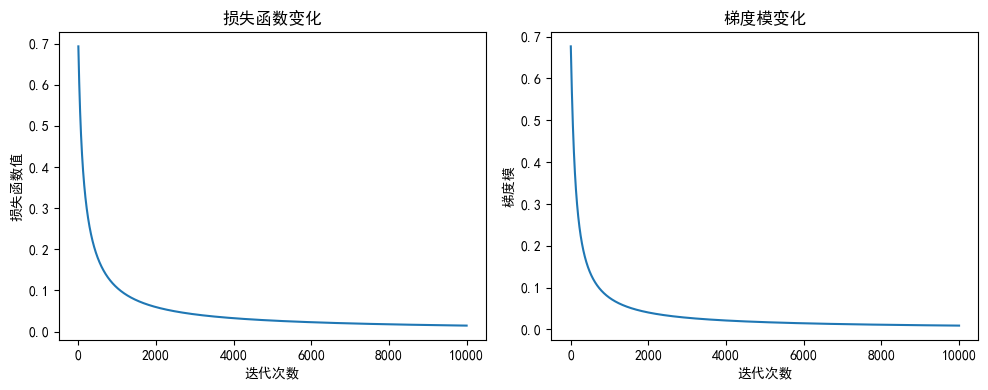

In [465]:
draw(10000, ls, gr)

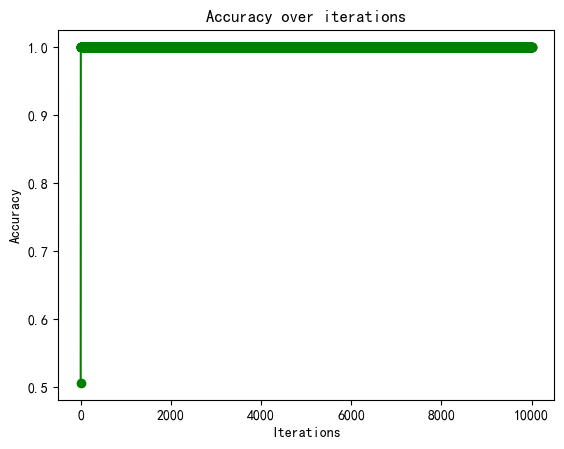

In [398]:
model_1.plot_accuracy()  # 绘制准确率曲线

使用Sklearn包验证

In [456]:
from sklearn.linear_model import LogisticRegression
model_s1 = LogisticRegression()
model_s1.fit(X_train_1, y_train_1)
weights = model_s1.coef_
intercept = model_s1.intercept_

# 输出参数
print("coefficients:", weights)
print("intercept:", intercept)
print("预测结果：", model_1.predict(X_test_1))

coefficients: [[ 0.93436309 -1.35444543  1.58684153  1.50716883]]
intercept: [2.25128365]
预测结果： [1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0]


#### 分类器2（setosa vs. virginica)

In [400]:
indices_02 = (y_train == 0) | (y_train == 2)  # 找出类别为0和2的索引
indices_02_t = (y_test == 0) | (y_test == 2)

X_train_2 = X_train[indices_02]
X_test_2 = X_test[indices_02_t]

y_train_2 = y_train[indices_02]
y_test_2 = y_test[indices_02_t]

y_train_2[y_train_2 == 2] = 1
y_test_2[y_test_2 == 2]  = 1

In [401]:
# 实例化和训练逻辑回归模型
model_2 = LogisticRegression()
model_2.fit(X_train_2, y_train_2)

print(model_2.predict(X_test_2))
print(y_test_2)

[0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1]
[0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1]


使用sklearn包验证

In [402]:
model_s2 = LogisticRegression()
model_s2.fit(X_train_2, y_train_2)
weights = model_s2.coef_
intercept = model_s2.intercept_

# 输出参数
print("coefficients:", weights)
print("intercept:", intercept)
print("预测结果：", model_2.predict(X_test_2))

coefficients: [[ 0.8224266  -0.7385878   1.33829004  1.39546167]]
intercept: [0.71541032]
预测结果： [0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1]


#### 分类器3（versicolor vs. virginica）

In [403]:
indices_03 = (y_train == 1) | (y_train == 2)  # 找出类别为0和2的索引
indices_03_t = (y_test == 1) | (y_test == 2)

X_train_3 = X_train[indices_03]
X_test_3 = X_test[indices_03_t]

y_train_3 = y_train[indices_03]
y_test_3 = y_test[indices_03_t]

y_train_3[y_train_3 == 2] = 0
y_test_3[y_test_3 == 2]  = 0

In [404]:
# 实例化和训练逻辑回归模型
model_3 = LogisticRegression()
model_3.fit(X_train_3, y_train_3)

print(model_3.predict(X_test_3))
print(y_test_3)

[1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0]
[1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0]


使用sklearn包验证

In [405]:
model_s3 = LogisticRegression()
model_s3.fit(X_train_3, y_train_3)
weights = model_s3.coef_
intercept = model_s3.intercept_

# 输出参数
print("coefficients:", weights)
print("intercept:", intercept)
print("预测结果：", model_3.predict(X_test_3))

coefficients: [[-0.25269278  0.57601981 -2.14118478 -2.89522098]]
intercept: [3.57649947]
预测结果： [1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0]


三个分类器均已训练完成，接下来用三个分类器进行分类

In [410]:
p1 = model_1.predict(X_test)

In [411]:
p2 = model_2.predict(X_test)

In [412]:
p3 = model_3.predict(X_test)

In [417]:
print(X_test.shape[0])

30


In [420]:
print(p1)

[1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1]


根据二分类结果进行投票

In [437]:
pre = np.zeros(X_test.shape[0])

for i in range(X_test.shape[0]):
    sp_dict = {'0': 0, '1': 0, '2': 0}
    if p1[i] == 0:
        sp_dict['0'] += 1
    else:
        sp_dict['1'] += 1
    if p2[i] == 0:
        sp_dict['0'] += 1
    else:
        sp_dict['2'] += 1
    if p3[i] == 0:
        sp_dict['2'] += 1
    else:
        sp_dict['1'] += 1
    max_key = max(sp_dict, key=sp_dict.get) 
    pre[i] = (max_key)

In [443]:
pre

array([1., 1., 1., 0., 1., 1., 0., 0., 0., 2., 2., 2., 0., 2., 2., 0., 1.,
       1., 2., 2., 0., 1., 1., 2., 1., 2., 0., 0., 2., 2.])

In [444]:
y_test

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1,
       1, 2, 1, 2, 0, 0, 2, 2])

对比可见，成功通过二分类解决多分类问题，在测试集上分类结果完全正确！！！